##### Import the libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

In [3]:
img1 = plt.imread('lenna.png')

In [4]:
img2 = cv2.imread('lenna.png')

##### Accessing Pixel Values

In [7]:
img2

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [17]:
img1.shape

(512, 512, 3)

In [18]:
img1[0,0]

array([0.8862745 , 0.5372549 , 0.49019608], dtype=float32)

In [19]:
x = img1[0,0]

In [20]:
x.shape

(3,)

In [21]:
x = x.reshape(1,1,3)

In [22]:
x

array([[[0.8862745 , 0.5372549 , 0.49019608]]], dtype=float32)

In [23]:
x.shape

(1, 1, 3)

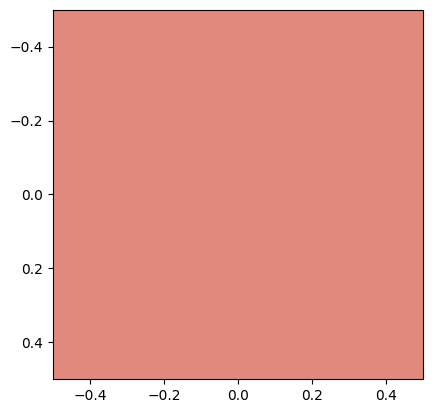

In [24]:
plt.imshow(x)

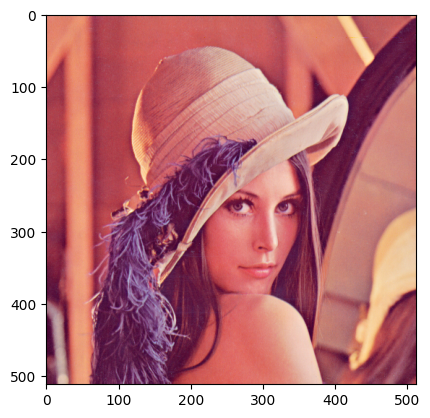

In [27]:
plt.imshow(img1)

In [30]:
import numpy as np

In [28]:
img1[200,100]

array([0.6862745 , 0.23137255, 0.27058825], dtype=float32)

In [31]:
img1[200, 100] = np.array([0,0,0])

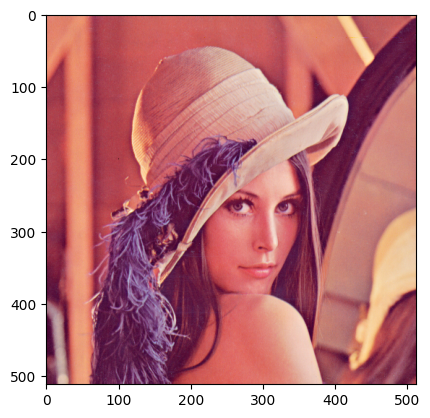

In [32]:
plt.imshow(img1)

In [36]:
img1[120]

array([[0.6117647 , 0.21568628, 0.2901961 ],
       [0.6117647 , 0.21568628, 0.2901961 ],
       [0.6       , 0.23137255, 0.29411766],
       ...,
       [0.8235294 , 0.5294118 , 0.49019608],
       [0.8235294 , 0.5294118 , 0.49803922],
       [0.83137256, 0.5411765 , 0.4862745 ]], dtype=float32)

In [37]:
img1[120].shape

(512, 3)

In [38]:
img1[120] = np.array([0,0,0])

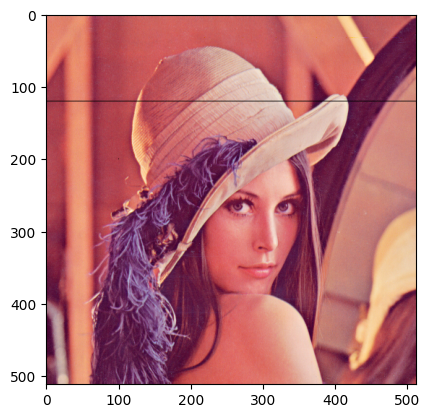

In [40]:
plt.imshow(img1)

##### Iterating the pixels

In [42]:
x = np.array([[4,5,6],[8,7,3]])

In [43]:
x

array([[4, 5, 6],
       [8, 7, 3]])

In [45]:
for row in x:
    for col in row:
        print(col+1.5)

5.5
6.5
7.5
9.5
8.5
4.5


In [52]:
img2.shape

(512, 512, 3)

In [59]:
for i in range(200,301):
    for j in range(200,301):
        img2[i,j] = np.array([0,255,255], dtype=np.uint8)

In [60]:
cv2.imshow('Image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Getting pixels using Pillow

In [62]:
img3 = Image.open('lenna.png')

In [63]:
pixel = img3.getpixel((0, 0))  # Note the reversed order

In [64]:
pixel

(226, 137, 125)

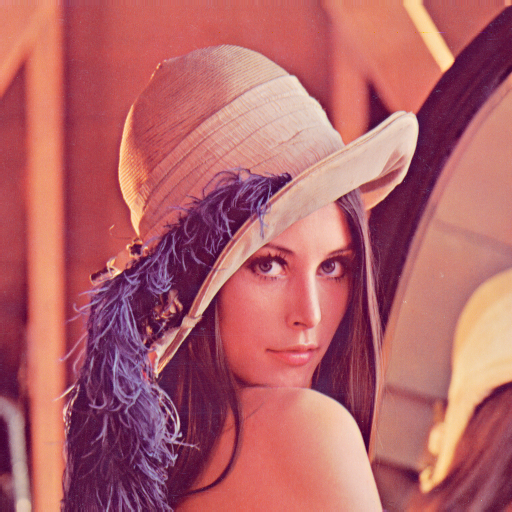

In [65]:
img3

In [67]:
img3.putpixel((250, 250), (0,0,0))

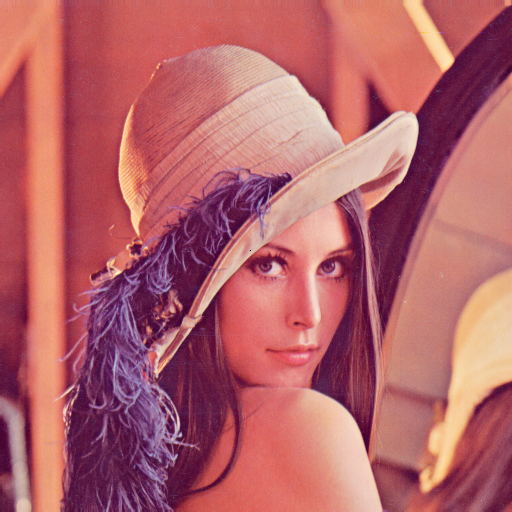

In [68]:
img3

In [69]:
for i in range(512):
    img3.putpixel((i, i), (0,0,0))

In [72]:
col = 511
for i in range(512):
    img3.putpixel((i, col), (0,0,0))
    col -= 1

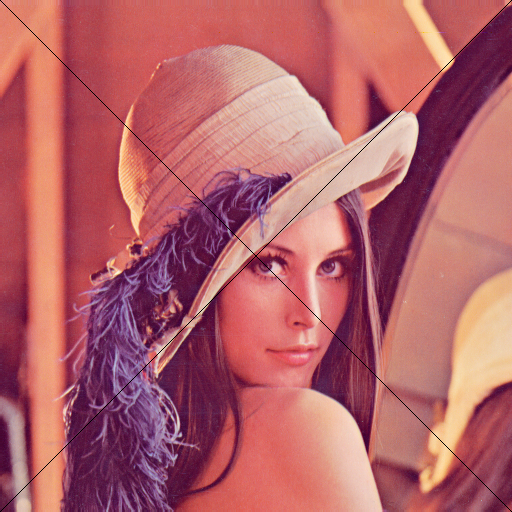

In [73]:
img3

##### Video Processing

In [95]:
# load the video
vid = cv2.VideoCapture('robots.mp4')

In [76]:
vid

< cv2.VideoCapture 0x758dbc3ada50>

In [93]:
ret, frame = vid.read()

In [84]:
ret

True

In [85]:
frame.shape

(640, 640, 3)

In [86]:
cv2.imshow('First Frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(vid.get(cv2.CAP_PROP_FPS))

In [88]:
print('Height            :', height)
print('Width             :', width)
print('Total Frames      :', frames)
print('Frames per second :', fps)

Height            : 640
Width             : 640
Total Frames      : 1799
Frames per second : 30


In [97]:
vid = cv2.VideoCapture('robots.mp4')
while True:
    ret, frame = vid.read()
    if not ret:
        break
    # Process the frame (e.g., apply filters, detect objects)
    cv2.imshow('Video', frame)
    if cv2.waitKey(5) == ord('q'):
        break
cv2.destroyAllWindows()

In [99]:
vid = cv2.VideoCapture('robots.mp4')

# get the first frame and see if successful
success, frame = vid.read()
# initiate count
count = 1
# keep extracting frames as long as success is True
while success:
    cv2.imwrite(f'images/{count}.jpg', frame)
    success, frame = vid.read()
    count += 1

##### Working with timestamps on frames

In [103]:
# get frame at a specific timestamp
timestamp = '00:00:43.00'
hours, minutes, seconds = [float(i) for i in timestamp.split(':')]
print(hours, minutes, seconds)

0.0 0.0 43.0


In [102]:
timestamp = '00:00:43.00'
timestamp.split(':')

['00', '00', '43.00']

In [104]:
# get number of frames up to timestamp
trigger_frame = hours * 3600 * fps + minutes * 60 * fps + seconds * fps
print(frames, trigger_frame)

1799 1290.0


In [107]:
# Go to frame selected by timestamp
vid.set(1, trigger_frame)
success, frame = vid.read()

# save the frame into an image file
if success:
    cv2.imwrite('screen.jpg', frame)

In [108]:
cv2.imshow('Frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Capture videos with cameras

In [121]:
cap = cv2.VideoCapture(0)

In [122]:
if cap.isOpened() == True:
    print('Camera is Present!')
else:
    print('Camera NOT available!')

Camera is Present!


In [123]:
# Read until video is completed 
while(cap.isOpened()):       
# Capture frame-by-frame 
    ret, frame = cap.read() 
    if ret == True: 
    # Display the resulting frame 
        cv2.imshow('Frame', frame)           
    # Press Q on keyboard to exit 
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break  
    else: 
        break  
# When everything done, release the video capture object 
cap.release() 
  
# Closes all the frames 
cv2.destroyAllWindows() 

##### Capture and store videos

In [124]:
# Create an object to read  
# from camera 
video = cv2.VideoCapture(0) 

In [125]:
# We need to set resolutions. so, convert them from float to integer. 
frame_width = int(video.get(3)) 
frame_height = int(video.get(4)) 
   
size = (frame_width, frame_height) 

In [126]:
size

(640, 480)

In [129]:
# Below VideoWriter object will create a frame of above defined The output  
# is stored in 'filename.avi' file. 
result = cv2.VideoWriter('myvid.avi',  cv2.VideoWriter_fourcc(*'MJPG'), 
                         30, size) 

In [130]:
while(True): 
    ret, frame = video.read()
    if ret == True:  
        # Write the frame into the file 'filename.avi' 
        result.write(frame) 
        # Display the frame saved in the file 
        cv2.imshow('Frame', frame) 
        # Press S on keyboard to stop the process 
        if cv2.waitKey(1) & 0xFF == ord('s'): 
            break
    # Break the loop 
    else: 
        break
cv2.destroyAllWindows()
video.release()